In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("student_scores.csv")

In [30]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
#Basically, here we are fitting the linear regression model using OLS
regressor = LinearRegression()
regressor.fit(X, y)
#Here we can print the coefficents and intercepts
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [9.77580339]
Intercept:  2.48367340537321


In [33]:
#I am predicting the target variable here
y_pred = regressor.predict(X)

In [34]:
# I am extracting the x and y values
X = data['Hours'].values
y = data['Scores'].values

In [35]:
# Define the OLS function to calculate the slope and intercept
def ols(X, y):
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(y)
    sum_xx = np.sum(X*X)
    sum_xy = np.sum(X*y)

    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)

    m = numerator/denominator
    b = np.mean(y) - m*np.mean(X)

    return m, b

In [36]:
# Calculate the slope and intercept using OLS
m, b = ols(X, y)

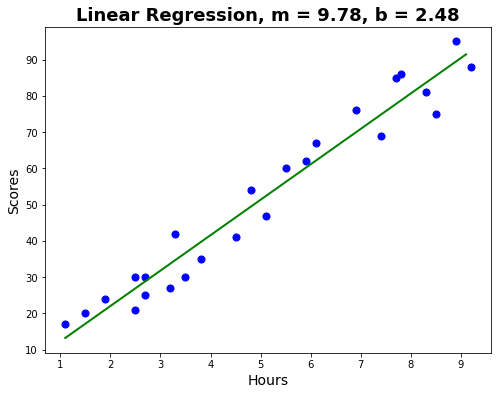

In [37]:
#Created a function to create least sqaures count
def plot_least_squares_line(X, y, m, b):
    # Create a scatter plot of the data
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X, y, color='blue', s=50)
    
    # Create the least squares line
    line_X = np.arange(min(X), max(X), 0.1)
    line_y = m*line_X + b
    
    # Plot the least squares line
    ax.plot(line_X, line_y, color='green', linewidth=2)
    
    # Add title and axis labels
    ax.set_title(f'Linear Regression, m = {m:.2f}, b = {b:.2f}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Hours', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)

    plt.show()

# Plot the least squares line
plot_least_squares_line(X, y, m, b)


In [38]:
import statsmodels.api as sm

In [39]:
x_list = data['Hours'].tolist()
y_list = data['Scores'].tolist() 
x_list = sm.add_constant(x_list)

In [40]:
model = sm.OLS(y_list, x_list).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 10 May 2023   Prob (F-statistic):           9.13e-17
Time:                        20:50:12   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# So finally implemented the OLS method by Python to predict student scores